In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
import holoviews as hv

%matplotlib notebook

In [2]:
ba_df = pd.read_csv(os.path.join('..', 'Outputs', 'Main_Data_Set_Cleaned.csv'))
display(ba_df)

,City,State,Country,2021 Pop. Estimate,Pop. Growth (%),Brewery ID,Brewery Name,Brewery Type,# Breweries in City,Beer Style,...,Basic Utilities,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website
0,Denton,Texas,United States,148146,4.0,426,Armadillo Ale Works,micro,10.0,American Double / Imperial Stout,...,162.230,60.430,960.000,900.000,1475.000,1875.000,3039.00,141123,142302,http://www.armadilloaleworks.com
1,Conroe,Texas,United States,94400,4.0,118,Southern Star Brewing Company,micro,3.0,American Pale Ale (APA),...,266.460,108.960,1271.250,900.000,2300.000,2000.000,3571.00,89148,90358,http://www.southernstarbrewing.com
2,Bozeman,Montana,United States,54539,3.0,219,Bozeman Brewing Company,micro,10.0,American Porter,...,138.540,71.245,1837.570,1550.000,2950.000,2650.000,4361.11,52855,53119,http://www.bozemanbrewing.com
3,Bend,Oregon,United States,102059,3.0,454,Deschutes Brewery,regional,30.0,American Pale Ale (APA),...,173.470,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.deschutesbrewery.com
4,Bend,Oregon,United States,102059,3.0,408,10 Barrel Brewing Company,large,30.0,American Pale Lager,...,173.470,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.10barrel.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Portland,Oregon,United States,641162,-2.0,116,Base Camp Brewing Co.,micro,50.0,American Pilsner,...,206.890,72.970,1760.260,1430.035,3242.640,2461.730,4599.72,652089,652388,http://www.basecampbrewingco.com
117,Shreveport,Louisiana,United States,184021,-2.0,269,Great Raft Brewing Company,micro,2.0,American Pale Ale (APA),...,187.110,68.660,750.000,600.000,900.000,750.000,2300.80,187993,187338,http://www.greatraftbrewing.com
118,Washington,District of Columbia,United States,670050,-3.0,227,DC Brau Brewing Company,regional,22.0,Scotch Ale / Wee Heavy,...,158.345,57.255,2307.110,1882.140,4600.000,3150.000,5907.32,689545,690093,http://www.dcbrau.com
119,Boston,Massachusetts,United States,654776,-3.0,300,Boston Beer Company,micro,11.0,Radler,...,180.475,60.565,2703.645,1959.190,4993.325,3348.535,5291.66,676216,674272,NaN


In [3]:
# Dropped the null values for the average monthly income
avgincomena_DF = ba_df.dropna(subset = ['Avg. Monthly Income (After Tax)'])
avgincomena_DF

,City,State,Country,2021 Pop. Estimate,Pop. Growth (%),Brewery ID,Brewery Name,Brewery Type,# Breweries in City,Beer Style,...,Basic Utilities,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website
0,Denton,Texas,United States,148146,4.0,426,Armadillo Ale Works,micro,10.0,American Double / Imperial Stout,...,162.230,60.430,960.000,900.000,1475.000,1875.000,3039.00,141123,142302,http://www.armadilloaleworks.com
1,Conroe,Texas,United States,94400,4.0,118,Southern Star Brewing Company,micro,3.0,American Pale Ale (APA),...,266.460,108.960,1271.250,900.000,2300.000,2000.000,3571.00,89148,90358,http://www.southernstarbrewing.com
2,Bozeman,Montana,United States,54539,3.0,219,Bozeman Brewing Company,micro,10.0,American Porter,...,138.540,71.245,1837.570,1550.000,2950.000,2650.000,4361.11,52855,53119,http://www.bozemanbrewing.com
3,Bend,Oregon,United States,102059,3.0,454,Deschutes Brewery,regional,30.0,American Pale Ale (APA),...,173.470,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.deschutesbrewery.com
4,Bend,Oregon,United States,102059,3.0,408,10 Barrel Brewing Company,large,30.0,American Pale Lager,...,173.470,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.10barrel.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Portland,Oregon,United States,641162,-2.0,116,Base Camp Brewing Co.,micro,50.0,American Pilsner,...,206.890,72.970,1760.260,1430.035,3242.640,2461.730,4599.72,652089,652388,http://www.basecampbrewingco.com
117,Shreveport,Louisiana,United States,184021,-2.0,269,Great Raft Brewing Company,micro,2.0,American Pale Ale (APA),...,187.110,68.660,750.000,600.000,900.000,750.000,2300.80,187993,187338,http://www.greatraftbrewing.com
118,Washington,District of Columbia,United States,670050,-3.0,227,DC Brau Brewing Company,regional,22.0,Scotch Ale / Wee Heavy,...,158.345,57.255,2307.110,1882.140,4600.000,3150.000,5907.32,689545,690093,http://www.dcbrau.com
119,Boston,Massachusetts,United States,654776,-3.0,300,Boston Beer Company,micro,11.0,Radler,...,180.475,60.565,2703.645,1959.190,4993.325,3348.535,5291.66,676216,674272,NaN


In [4]:
# Calculate the avergae beer price between the imported and domestic beer 
avgincomena_DF['Average Beer Price'] = avgincomena_DF[['Domestic Beer (Restaurant)','Imported Beer (Restaurant)']].mean(axis=1)
avgincomena_DF

C:\Users\jarvi_bi57i\AppData\Local\Temp\ipykernel_29060\2917560911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgincomena_DF['Average Beer Price'] = avgincomena_DF[['Domestic Beer (Restaurant)','Imported Beer (Restaurant)']].mean(axis=1)


,City,State,Country,2021 Pop. Estimate,Pop. Growth (%),Brewery ID,Brewery Name,Brewery Type,# Breweries in City,Beer Style,...,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website,Average Beer Price
0,Denton,Texas,United States,148146,4.0,426,Armadillo Ale Works,micro,10.0,American Double / Imperial Stout,...,60.430,960.000,900.000,1475.000,1875.000,3039.00,141123,142302,http://www.armadilloaleworks.com,4.250
1,Conroe,Texas,United States,94400,4.0,118,Southern Star Brewing Company,micro,3.0,American Pale Ale (APA),...,108.960,1271.250,900.000,2300.000,2000.000,3571.00,89148,90358,http://www.southernstarbrewing.com,4.000
2,Bozeman,Montana,United States,54539,3.0,219,Bozeman Brewing Company,micro,10.0,American Porter,...,71.245,1837.570,1550.000,2950.000,2650.000,4361.11,52855,53119,http://www.bozemanbrewing.com,5.750
3,Bend,Oregon,United States,102059,3.0,454,Deschutes Brewery,regional,30.0,American Pale Ale (APA),...,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.deschutesbrewery.com,6.000
4,Bend,Oregon,United States,102059,3.0,408,10 Barrel Brewing Company,large,30.0,American Pale Lager,...,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.10barrel.com,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Portland,Oregon,United States,641162,-2.0,116,Base Camp Brewing Co.,micro,50.0,American Pilsner,...,72.970,1760.260,1430.035,3242.640,2461.730,4599.72,652089,652388,http://www.basecampbrewingco.com,6.500
117,Shreveport,Louisiana,United States,184021,-2.0,269,Great Raft Brewing Company,micro,2.0,American Pale Ale (APA),...,68.660,750.000,600.000,900.000,750.000,2300.80,187993,187338,http://www.greatraftbrewing.com,4.000
118,Washington,District of Columbia,United States,670050,-3.0,227,DC Brau Brewing Company,regional,22.0,Scotch Ale / Wee Heavy,...,57.255,2307.110,1882.140,4600.000,3150.000,5907.32,689545,690093,http://www.dcbrau.com,7.625
119,Boston,Massachusetts,United States,654776,-3.0,300,Boston Beer Company,micro,11.0,Radler,...,60.565,2703.645,1959.190,4993.325,3348.535,5291.66,676216,674272,NaN,7.500


In [60]:
# Creating Scatterplot and calculating r-value using hvplot

X = avgincomena_DF['Avg. Monthly Income (After Tax)']
Y = avgincomena_DF['Average Beer Price']

correlation = st.pearsonr(X, Y)[0]

# Calculate summary statistics for average beer price and average monthly income
mean_beer_price_allCities = Y.mean()
max_average_beerPrice = Y.max()
min_average_beerPrice = Y.min()

mean_averageIncome_allCities = X.mean()
max_averageIncome_allCities = X.max()
min_averageIncome_allCities = X.min()


# Show plot and print r-value and summary statistics
print(f"The r-value is {round(correlation,2)}")
print(f"The maximum price for beer is ${round(max_average_beerPrice,2)}, the minimum price for beer is ${round(min_average_beerPrice,2)}, and the mean price of beer is ${round(mean_beer_price_allCities,2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(X, Y)

print(f'line of best fit : y = {str(round(slope,6))}x + {str(round(intercept,2))}')

#print(f"The r-value is {round(correlation,2)}")

df = avgincomena_DF.hvplot.scatter(label = 'Average Beer vs Average Monthly Income', x='Avg. Monthly Income (After Tax)', y='Average Beer Price', by='City', height=700, width=800,
                                  hover_cols=['State', 'City', 'Avg. Monthly Income (After Tax)', 'Average Beer Price'])
df

The r-value is 0.65
The maximum price for beer is $7.88, the minimum price for beer is $3.5, and the mean price of beer is $5.84
line of best fit : y = 0.000595x + 3.26


:NdOverlay   [City]
   :Scatter   [Avg. Monthly Income (After Tax)]   (Average Beer Price,State,City)

<IPython.core.display.Javascript object>


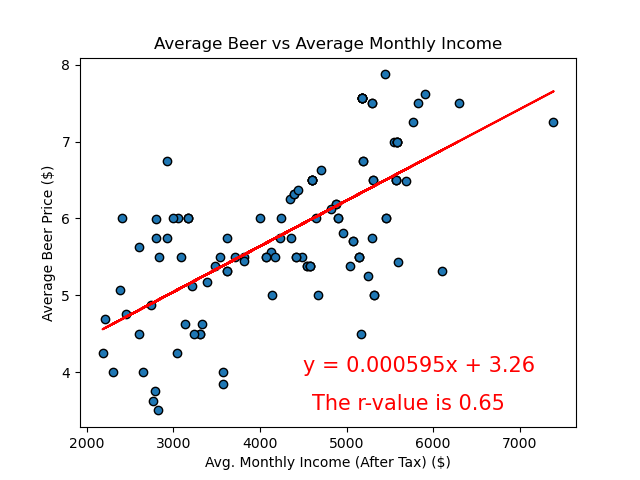

The r-value is 0.65
The maximum price for beer is $7.88, the minimum price for beer is $3.5, and the mean price of beer is $5.84


In [59]:
# Creating Scatterplot and linear regression using matplotlib

X = avgincomena_DF['Avg. Monthly Income (After Tax)']
Y = avgincomena_DF['Average Beer Price']

# Build scatter plot
plt.scatter(X, Y, marker="o", color="tab:blue", edgecolor = "black", linewidth=1)

plt.title('Average Beer vs Average Monthly Income')
plt.xlabel('Avg. Monthly Income (After Tax) ($)')
plt.ylabel('Average Beer Price ($)')

correlation = st.pearsonr(X, Y)[0]

# Draw line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(X,Y)

y_reg = slope * X + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.plot(X, y_reg, "r-")

# Show equation for line of best fit and r-value on graph
plt.annotate(line_eq, (4500,4),fontsize=15,color="red")
plt.annotate(f"The r-value is {round(correlation,2)}",(4600,3.5),fontsize=15,color="red")

# Calculate summary statistics for average beer price and average monthly income
mean_beer_price_allCities = Y.mean()
max_average_beerPrice = Y.max()
min_average_beerPrice = Y.min()

mean_averageIncome_allCities = X.mean()
max_averageIncome_allCities = X.max()
min_averageIncome_allCities = X.min()


# Show plot and print r-value and summary statistics
print(f"The r-value is {round(correlation,2)}")
print(f"The maximum price for beer is ${round(max_average_beerPrice,2)}, the minimum price for beer is ${round(min_average_beerPrice,2)}, and the mean price of beer is ${round(mean_beer_price_allCities,2)}")
plt.show()
